# Netflix titles EDA, Visualization, & ML models (Recommender systems, NLP)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
netflix = pd.read_csv('data/netflix_titles.csv')

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## EDA & Visualization

### Total number of movies and tv shows on netflix

<AxesSubplot:xlabel='type', ylabel='count'>

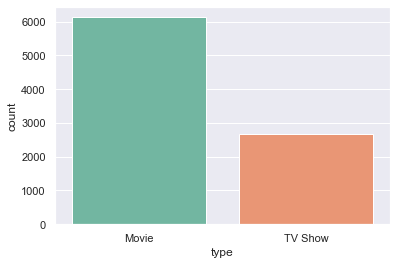

In [36]:
sns.set(style="darkgrid")

sns.countplot(data=netflix, x='type', palette='Set2')

### Total number of movies and tv shows added per year

In [37]:
netflix['year_added'] = netflix['date_added'].str[-4:]

In [143]:
netflix_movies = netflix[netflix['type']=='Movie']
netflix_tv = netflix[netflix['type']=='TV Show']

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', 'nan']


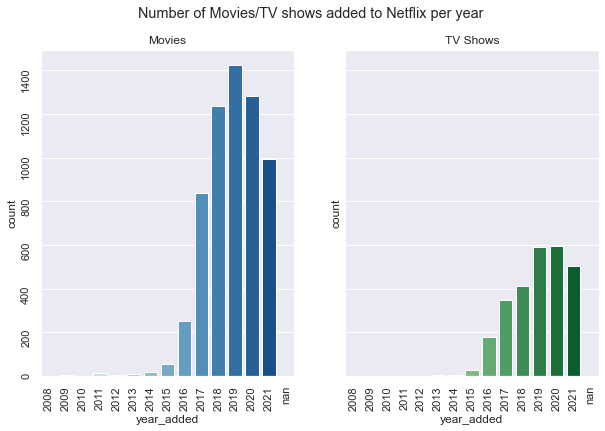

In [41]:
# number of movies/tvshows per year added
# order year added ascending
years_added = sorted(list(netflix['year_added'].astype(str).unique()))
print(years_added)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6), sharey=True)
fig.suptitle('Number of Movies/TV shows added to Netflix per year')
sns.countplot(ax=ax1, data=netflix_movies, x='year_added', palette='Blues', order=years_added)
ax1.set_title('Movies')
ax1.tick_params(labelrotation=90)

sns.countplot(ax=ax2, data=netflix_tv, x='year_added', palette='Greens', order=years_added)
ax2.set_title('TV Shows')
ax2.tick_params(labelrotation=90)

### Number of total movies and tv shows added per month per year

In [47]:
# number of releases either tv or movies by month/year
netflix_date_added = netflix[['date_added']].dropna()
netflix_date_added['year'] = netflix_date_added['date_added'].apply(lambda x : x.lstrip().split(' ')[-1]).astype(str)
netflix_date_added['month'] = netflix_date_added['date_added'].apply(lambda x : x.lstrip().split(' ')[0]).astype(str)
netflix_date_added.head()

,date_added,year,month
0,"September 25, 2021",2021,September
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September


In [63]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
heatmap_df = netflix_date_added.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
heatmap_df


year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,43.0,72.0,129.0,153.0,205.0,132.0
February,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,15.0,82.0,87.0,148.0,114.0,109.0
March,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,17.0,125.0,173.0,172.0,137.0,112.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,93.0,115.0,162.0,177.0,188.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,34.0,115.0,164.0,131.0,129.0,178.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,113.0,124.0,123.0,168.0,183.0


Text(0.5, 1.0, 'Content added to Netflix by year and month')

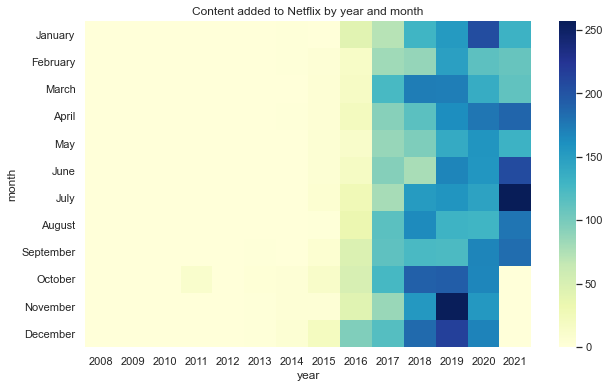

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(data=heatmap_df, cmap="YlGnBu")
plt.title("Content added to Netflix by year and month")

### Count of ratings for both movies and tv

In [74]:
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

Text(0.5, 1.0, 'Movies & TV Shows ratings')

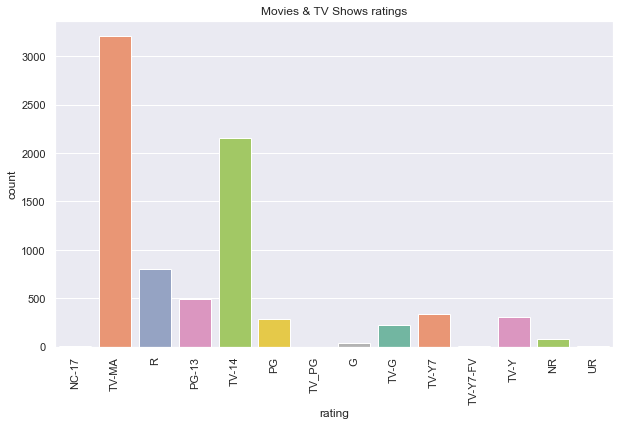

In [77]:
# movie and tv ratings
ratings_order = ['NC-17', 'TV-MA', 'R', 'PG-13', 'TV-14', 'PG', 'TV_PG', 'G', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-Y', 'NR', 'UR']

plt.figure(figsize=(10,6))
sns.countplot(data=netflix, x='rating', palette='Set2', order=ratings_order)
plt.xticks(rotation=90)
plt.title("Movies & TV Shows ratings")

In [91]:
list(netflix_movies['country'].unique())[2]

'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'

### Top movie & tv show producing countries

In [96]:
# movie country data
# create a dictionary for all countries and iterate through list of country lists
country_dict = {}
for countries in list(netflix_movies['country'].dropna()):
    countries_as_list = countries.split(', ')
    for country in countries_as_list:
        if country not in country_dict:
            country_dict[country] = 1
        else:
            country_dict[country] += 1
    
        

In [106]:
movie_country = pd.DataFrame.from_dict(data=country_dict, orient='index', columns=['Count']).reset_index().rename(columns={'index':'Country'})

In [115]:
movie_country.sort_values(by=['Count'], ascending=False, inplace=True)
movie_country.head()

,Country,Count
0,United States,2751
7,India,962
3,United Kingdom,532
10,Canada,319
8,France,303


Text(0.5, 1.0, 'Number of Movies by country (top 10)')

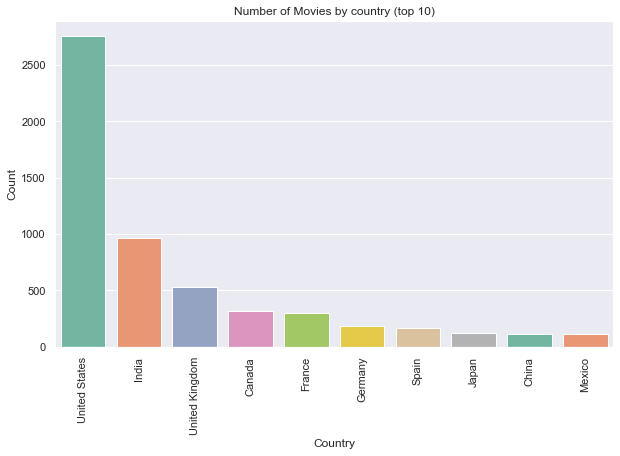

In [118]:
plt.figure(figsize=(10,6))
sns.barplot(data=movie_country[:10], x='Country', y='Count', palette='Set2')
plt.xticks(rotation=90)
plt.title("Number of Movies by country (top 10)")

Text(0.5, 1.0, 'Number of TV Shows by country (top 10)')

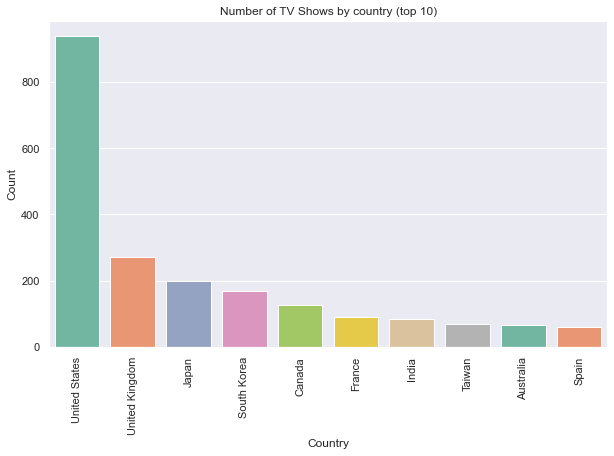

In [120]:
#tv country data
# tv country data
# create a dictionary for all countries and iterate through list of country lists
country_tv_dict = {}
for countries in list(netflix_tv['country'].dropna()):
    countries_as_list = countries.split(', ')
    for country in countries_as_list:
        if country not in country_tv_dict:
            country_tv_dict[country] = 1
        else:
            country_tv_dict[country] += 1
    
tv_country = pd.DataFrame.from_dict(data=country_tv_dict, orient='index', columns=['Count']).reset_index().rename(columns={'index':'Country'})     
tv_country.sort_values(by=['Count'], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(data=tv_country[:10], x='Country', y='Count', palette='Set2')
plt.xticks(rotation=90)
plt.title("Number of TV Shows by country (top 10)")

In [124]:
# relationship between # of movies and # of tv shows a country produces
movie_tv_country = movie_country.merge(tv_country, on='Country')
movie_tv_country = movie_tv_country.rename(columns={'Count_x': 'Movies', 'Count_y': 'TV Shows'})
movie_tv_country['Movies + TV Shows'] = movie_tv_country['Movies'] + movie_tv_country['TV Shows']
movie_tv_country.sort_values(by=['Movies + TV Shows'])
movie_tv_country.head()

,Country,Movies,TV Shows,Movies + TV Shows
0,United States,2751,938,3689
1,India,962,84,1046
2,United Kingdom,532,272,804
3,Canada,319,126,445
4,France,303,90,393


(0.0, 3000.0)

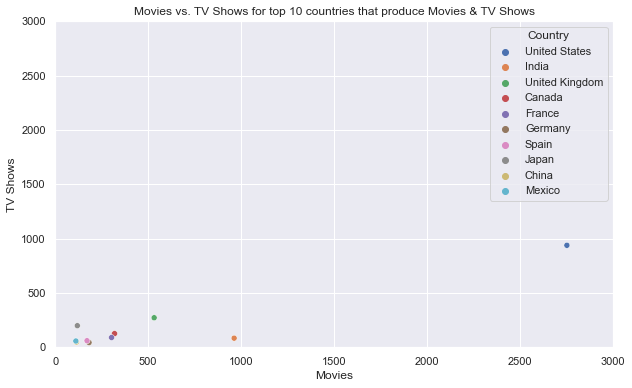

In [126]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=movie_tv_country[:10], x='Movies', y='TV Shows', hue='Country')
plt.title("Movies vs. TV Shows for top 10 countries that produce Movies & TV Shows")
plt.xlim(0,3000)
plt.ylim(0,3000)

### Movie duration distribution

In [146]:
netflix_movies['duration_as_int'] = netflix_movies['duration'].str.replace(' min', '')
netflix_movies_duration = netflix_movies[['duration_as_int']].dropna()
netflix_movies_duration['duration_as_int'] = netflix_movies_duration.astype(int)


/var/folders/lm/qyhkwyxn1jx1gmv7y89fl4qmfkzt2b/T/ipykernel_79988/3244586982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration_as_int'] = netflix_movies['duration'].str.replace(' min', '')


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of movie length')

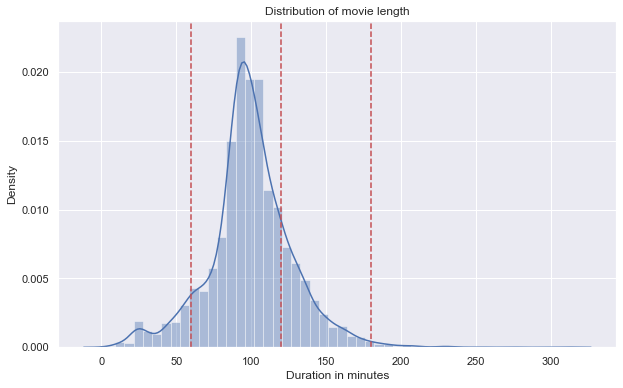

In [155]:
plt.figure(figsize=(10,6))
sns.distplot(netflix_movies_duration['duration_as_int'])
plt.axvline(x=60, linestyle='--', color='r')
plt.axvline(x=120, linestyle='--', color='r')
plt.axvline(x=180, linestyle='--', color='r')
plt.xlabel('Duration in minutes')
plt.title("Distribution of movie length")

### TV Show duration distribution

In [156]:
netflix_tv['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [163]:
netflix_tv_duration = netflix_tv[['duration']]
netflix_tv_duration['duration'] = netflix_tv_duration['duration'].apply(lambda x : x.split(' ')[0])
netflix_tv_duration.head()

/var/folders/lm/qyhkwyxn1jx1gmv7y89fl4qmfkzt2b/T/ipykernel_79988/2944026339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_tv_duration['duration'] = netflix_tv_duration['duration'].apply(lambda x : x.split(' ')[0])


,duration
1,2
2,1
3,1
4,2
5,1


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of TV show length')

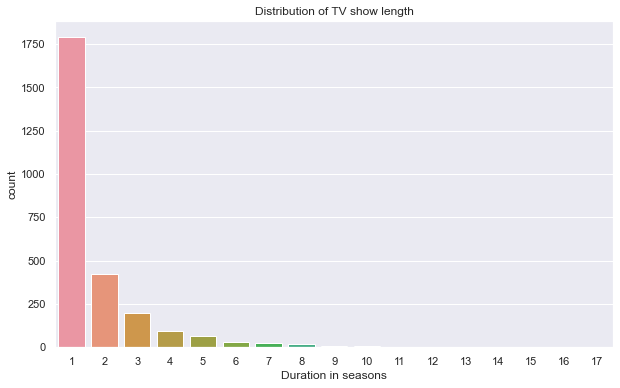

In [168]:
plt.figure(figsize=(10,6))
sns.countplot(netflix_tv_duration['duration'].astype(int), order=range(1,18))
plt.xlabel('Duration in seasons')
plt.title("Distribution of TV show length")

In [ ]:
netflix_tv['duration'] = netflix_tv['duration'].apply(lambda x : x.split(' ')[0]).astype(int)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "Grey's Anatomy"),
  Text(1, 0, 'NCIS'),
  Text(2, 0, 'Supernatural'),
  Text(3, 0, 'COMEDIANS of the world'),
  Text(4, 0, 'Heartland'),
  Text(5, 0, 'Red vs. Blue'),
  Text(6, 0, 'Trailer Park Boys'),
  Text(7, 0, 'Criminal Minds'),
  Text(8, 0, 'Cheers'),
  Text(9, 0, 'Frasier')])

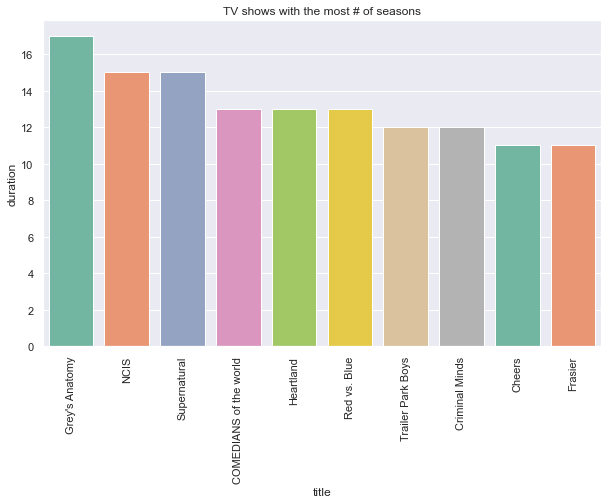

In [192]:
# tv shows with the most seasons

netflix_tv = netflix_tv.sort_values(by=['duration'], ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=netflix_tv[:10], x='title', y='duration', palette='Set2')
plt.title("TV shows with the most # of seasons")
plt.xticks(rotation=90)

### Movie genre distrubtion

In [171]:
movie_genre_dict = {}
movies_genre_list = list(netflix_movies['listed_in'])
for movie_genre_list in movies_genre_list:
    genres = movie_genre_list.split(', ')
    for genre in genres:
        if genre not in movie_genre_dict:
            movie_genre_dict[genre] = 1
        else:
            movie_genre_dict[genre] += 1
        

In [178]:
movie_genre_df = pd.DataFrame.from_dict(movie_genre_dict, orient='index', columns=['Count']).reset_index().rename(columns={'index': 'Genre'}).sort_values(by=['Count'], ascending=False)
movie_genre_df.head()

,Genre,Count
4,International Movies,2752
2,Dramas,2427
5,Comedies,1674
0,Documentaries,869
11,Action & Adventure,859


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'Documentaries'),
  Text(4, 0, 'Action & Adventure'),
  Text(5, 0, 'Independent Movies'),
  Text(6, 0, 'Children & Family Movies'),
  Text(7, 0, 'Romantic Movies'),
  Text(8, 0, 'Thrillers'),
  Text(9, 0, 'Music & Musicals'),
  Text(10, 0, 'Horror Movies'),
  Text(11, 0, 'Stand-Up Comedy'),
  Text(12, 0, 'Sci-Fi & Fantasy'),
  Text(13, 0, 'Sports Movies'),
  Text(14, 0, 'Classic Movies'),
  Text(15, 0, 'LGBTQ Movies'),
  Text(16, 0, 'Anime Features'),
  Text(17, 0, 'Cult Movies'),
  Text(18, 0, 'Faith & Spirituality'),
  Text(19, 0, 'Movies')])

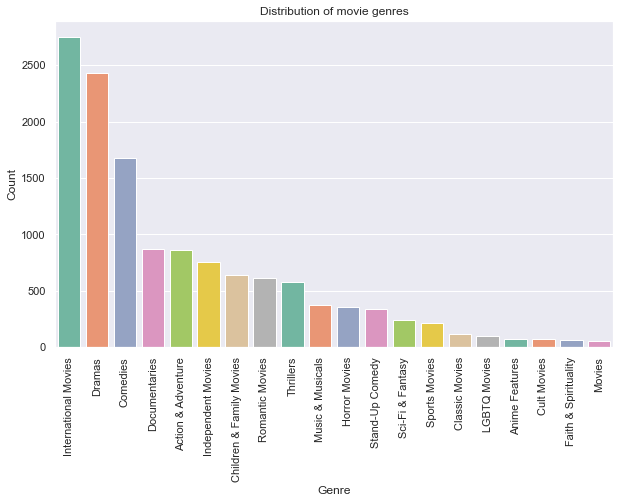

In [181]:
plt.figure(figsize=(10,6))
sns.barplot(data=movie_genre_df, x='Genre', y='Count', palette='Set2')
plt.title("Distribution of movie genres")
plt.xticks(rotation=90)

### TV genre distribution

In [183]:
tv_genre_dict = {}
tvs_genre_list = list(netflix_tv['listed_in'])
for tv_genre_list in tvs_genre_list:
    genres = tv_genre_list.split(', ')
    for genre in genres:
        if genre not in tv_genre_dict:
            tv_genre_dict[genre] = 1
        else:
            tv_genre_dict[genre] += 1
        

In [184]:
tv_genre_df = pd.DataFrame.from_dict(tv_genre_dict, orient='index', columns=['Count']).reset_index().rename(columns={'index': 'Genre'}).sort_values(by=['Count'], ascending=False)
tv_genre_df.head()


,Genre,Count
0,International TV Shows,1351
1,TV Dramas,763
8,TV Comedies,581
3,Crime TV Shows,470
13,Kids' TV,451


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'International TV Shows'),
  Text(1, 0, 'TV Dramas'),
  Text(2, 0, 'TV Comedies'),
  Text(3, 0, 'Crime TV Shows'),
  Text(4, 0, "Kids' TV"),
  Text(5, 0, 'Docuseries'),
  Text(6, 0, 'Romantic TV Shows'),
  Text(7, 0, 'Reality TV'),
  Text(8, 0, 'British TV Shows'),
  Text(9, 0, 'Anime Series'),
  Text(10, 0, 'Spanish-Language TV Shows'),
  Text(11, 0, 'TV Action & Adventure'),
  Text(12, 0, 'Korean TV Shows'),
  Text(13, 0, 'TV Mysteries'),
  Text(14, 0, 'Science & Nature TV'),
  Text(15, 0, 'TV Sci-Fi & Fantasy'),
  Text(16, 0, 'TV Horror'),
  Text(17, 0, 'Teen TV Shows'),
  Text(18, 0, 'TV Thrillers'),
  Text(19, 0, 'Stand-Up Comedy & Talk Shows'),
  Text(20, 0, 'Classic & Cult TV'),
  Text(21, 0, 'TV Shows')])

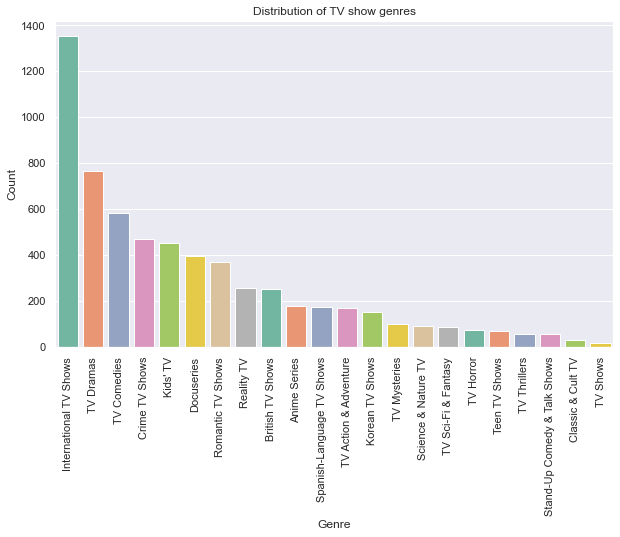

In [185]:
plt.figure(figsize=(10,6))
sns.barplot(data=tv_genre_df, x='Genre', y='Count', palette='Set2')
plt.title("Distribution of TV show genres")
plt.xticks(rotation=90)

# Recommendation system content based

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. 

This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [197]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

Recommendations are based SOLEY ON DESCRIPTION

In [209]:
# set up tfdif & remove stop words (common words that don't provide any information i.e. 'the')
tfidf = TfidfVectorizer(stop_words='english')

# add empty strings where there are null values
netflix['description'] = netflix['description'].fillna('')

# make TF-IDF matrix by fitting & transforming data
tfidf_matrix = tfidf.fit_transform(netflix['description'])

# get shape of matrix
tfidf_matrix.shape

(8807, 18895)

Use cosine similarity score as it is independent of magnitude and fast to calculate

In [201]:
from sklearn.metrics.pairwise import linear_kernel

# compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [204]:
# get the indeces and matching titles of all titles
indices = pd.Series(netflix.index, index=netflix['title']).drop_duplicates()

In [206]:
# write a get_recommendation function
def get_recommendation(title, cosine_sim=cosine_sim):
    # get index of title
    idx = indices[title]
    
    # all pairwise similarity scores of all movies with the movie of interest
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # sort based on similairty
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # top 10 most similar titles
    top_sim_scores = sim_scores[1:11]
    
    # get the movie indices
    movie_indices = [i[0] for i in top_sim_scores]
    
    return netflix['title'].iloc[movie_indices]

In [215]:
get_recommendation('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

## Content based filtering on multiple metrics, not just description

- Title
- Cast
- Director
- Listed in (genre)
- Plot

In [217]:
# fill all null values with empty strings
netflix_filledna = netflix.fillna('')

netflix_filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021


In [218]:
# clean the data

# make all words in features lower case & rempve spaces
def clean_data(x):
    return str.lower(x.replace(' ', ''))

In [219]:
# feature list
features = ['title', 'director', 'cast', 'listed_in', 'description']
netflix_filledna = netflix_filledna[features]

In [220]:
# clean the data in all of the features
for feature in features:
    netflix_filledna[feature] = netflix_filledna[feature].apply(clean_data)

In [221]:
netflix_filledna.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


### Create a bag of words for all features using count vectorizor instead of tfidf

In [222]:
def create_bow(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [223]:
netflix_filledna['bow'] = netflix_filledna.apply(create_bow, axis=1)

In [224]:
netflix_filledna['bow'].head(2) 

0    dickjohnsonisdead kirstenjohnson  documentarie...
1    blood&water  amaqamata,khosingema,gailmabalane...
Name: bow, dtype: object

In [226]:
from sklearn.metrics.pairwise import cosine_similarity

In [227]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(netflix_filledna['bow'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [231]:
netflix_filledna=netflix_filledna.reset_index()
indices = pd.Series(netflix_filledna.index, index=netflix_filledna['title'])

In [236]:
def get_recommendations_multi_features(title, cosine_sim=cosine_sim2):
    title=title.replace(' ', '').lower()
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix['title'].iloc[movie_indices]

In [237]:
get_recommendations_multi_features('Peaky Blinders')

3034                    Giri / Haji
5032    The Frankenstein Chronicles
8431          The Murder Detectives
4951                         Loaded
4809                  Kiss Me First
6922                   Happy Valley
2184                       Get Even
519                   I AM A KILLER
3789                 Killer Ratings
4476          Terrorism Close Calls
Name: title, dtype: object